# Centralized model training

In [1]:
import functools
import os

from gossiplearning.config import Config
from utils.model_creators import create_LSTM
from utils.multiprocessing import run_in_parallel

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import json
from pathlib import Path

from utils.centralized_training import train_centralized_model

In [2]:
with open("config.json", "r") as f:
    config = Config.model_validate(json.load(f))

In [3]:
timesteps = 4
dataset_path = Path("data/datasets/1func_10nodes_3k")

In [4]:
create_LSTM(config).summary()

Metal device set to: Apple M1 Pro
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 9)]            0         
                                                                 
 sequential (Sequential)     (None, 50)                32200     
                                                                 
 fn_0 (Dense)                (None, 1)                 51        
                                                                 
Total params: 32,251
Trainable params: 32,251
Non-trainable params: 0
_________________________________________________________________


In [5]:
run_in_parallel([
    functools.partial(
        train_centralized_model,
        node_datasets_folder=dataset_path / str(i) / f"{timesteps}in",
        model_output_path=dataset_path / str(i) / f"{timesteps}in" / "models",
        config=config,
        model_creator=functools.partial(create_LSTM, config=config),
        verbose=0,
    )
    for i in range(5)
])

Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro
Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB


systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB


systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB


In [6]:
# i = 0
# train_centralized_model(
#     node_datasets_folder=dataset_path / str(i) / f"{config.training.timesteps}in",
#     model_output_path=dataset_path / str(i) / f"{config.training.timesteps}in" / "models",
#     config=config,
#     model_creator=functools.partial(create_LSTM, config=config),
#     verbose=1,
# )

In [51]:
from utils.data import load_npz_data
from keras.models import load_model

model = load_model(f"data/datasets/porto_10n_3k/0/4in_notscaled/models/centralized.h5")
datasets = tuple([load_npz_data(f"data/datasets/porto_10n_3k/0/4in_notscaled/node_{i}.npz") for i in range(10)])

In [52]:
import numpy as np
X = np.concatenate([d[4] for d in datasets])
Y = np.concatenate([d[5] for d in datasets])

In [53]:
predictions = model.predict(X)

657/657 [==============================] - 4s 5ms/step


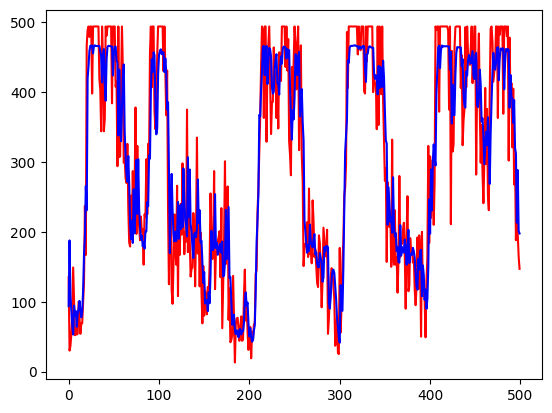

In [54]:
from matplotlib import pyplot as plt

func = 0
start = 0
end = 500

fig1, ax1 = plt.subplots()

ax1.plot(
    Y[start:end, func],
    label="truth",
    color="red",
)

ax1.plot(predictions[start:end], label="predictions", color="blue")

plt.show()

In [8]:
Y.shape

(21020, 1)